In [1]:
from __future__ import (division, print_function, absolute_import, unicode_literals)
# from builtins import int
try:
    from future_builtins import ascii, filter, hex, map, oct, zip
except:
    pass
import sys
if sys.version_info.major > 2:
    xrange = range


import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.html.widgets import *
from ipywidgets import jslink
from IPython.display import display
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from os.path import join
import math
dbpath = r'../db'
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations

def imshow(*imgs, **kw):
    bgr2rgb = False
    nimg = len(imgs)
    if kw.get('col') is None:
        col = nimg ** .5
        col = int(col + 1 if col % 1 else col)
    else:
        col = kw.pop('col')
    row = nimg / col
    row = row + 1 if (col * row) - nimg else row
    row, col = int(row), int(col)
    if row == col == 1:
        plts = [plt.subplots(row,col,figsize=kw.pop('figsize',(10,10)))[1]]
    else:
        plts = plt.subplots(row,col,figsize=kw.pop('figsize',(10,10)))[1].ravel()
    for img, ax in zip(imgs, plts):
        if len(img)==2:
            name, img = img
            if kw.get('cmap') == 'bgr' or bgr2rgb:
                kw.pop('cmap',None)
                bgr2rgb = True
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # bgr to rgb
            ax.imshow(img,**kw)
            ax.set_title(name)
        else:
            if kw.get('cmap') == 'bgr' or bgr2rgb:
                kw.pop('cmap',None)
                bgr2rgb = True
                img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # bgr to rgb
            ax.imshow(img,**kw)
    plt.show()

/usr/local/lib/python2.7/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
def func(sample_freq, order):
    x, y = np.mgrid[-1:1:sample_freq*1j, -1:1:sample_freq*1j]
    z = 1 * np.exp(-2*(x**order+y**order))
    imshow(z,cmap=None,figsize=(5,5),interpolation='none')
interactive(func,sample_freq=(1, 120, 1), order=(2, 20, 2))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT02MCwgZGVzY3JpcHRpb249dSdzYW1wbGVfZnJlcScsIG1heD0xMjAsIG1pbj0xKSwgSW50U2xpZGVyKHZhbHVlPTEwLCBkZXPigKY=


In [10]:
img = cv2.imread(join(dbpath,r'lena.jpg'))
def func(down_sample):
    imshow(('Original',img), 
           ('Sampling',img[::down_sample,::down_sample]),
           interpolation='none',cmap='bgr')
interactive(func,down_sample=(1, 51, 10))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yMSwgZGVzY3JpcHRpb249dSdkb3duX3NhbXBsZScsIG1heD01MSwgbWluPTEsIHN0ZXA9MTApLCBPdXRwdXQoKSksIF9kb23igKY=


In [12]:
img1 = cv2.imread(join(dbpath,'sampling.jpg'),0)

def quantize_img(quantize_level):
    img2 = img1.copy()
    step = np.linspace(0, 256, quantize_level + 1).astype('u2')
    
    nstep = step[1:]
    for ps, ns in zip(step, nstep):
        img2[(ps <= img1) & (img1 <= ns)] = ps
    img2 = img2.astype('u1')
    imshow(('Original', img1),
           ('Amplitude Quantized', img2), cmap='gray',
            interpolation='none')
#     print(step) 
    
interactive(quantize_img,quantize_level=(2, 255, 1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMjgsIGRlc2NyaXB0aW9uPXUncXVhbnRpemVfbGV2ZWwnLCBtYXg9MjU1LCBtaW49MiksIE91dHB1dCgpKSwgX2RvbV9jbGHigKY=


In [14]:
img1 = cv2.imread(join(dbpath,r'gumby.bmp'),0)

def translation_edge_detection(scale):
    img2 = img1.copy()
    img3 = img1.copy()
    img4 = np.zeros_like(img1).copy()

    img2[:-scale] = img1[scale:]
    img2 = img1 - img2
    img3[scale:] = img1[:-scale]
    img3 = img1 - img3
    img4[img2 == 255] = 255
    img4[img3 == 255] = 255
    imshow(('Input Image',img1), 
           ('Slide Left Top', img2),
           ('Slide Right Bottom', img3),
           ('Output Image', img4),
           cmap='binary',
            interpolation='none')
interactive(translation_edge_detection,scale=(1, 25, 5))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0xMSwgZGVzY3JpcHRpb249dSdzY2FsZScsIG1heD0yNSwgbWluPTEsIHN0ZXA9NSksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2XigKY=


In [15]:
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[:-1] - x[1:]
edge[edge <= 0] = 0  # quantization
edge[edge > 0] = 1  # quantization
print(edge)
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])
edge = x[1:] - x[:-1]
edge[edge <= 0] = 0 # quantization
edge[edge > 0] = 1 # quantization
print(edge)

[0 0 0 1 0 0 0]
[0 0 0 0 0 0 0]


In [16]:
img = cv2.imread(join(dbpath,'lena.jpg'),0)

def create_mask(radius,filter='hpf'):
    rows, cols = img.shape
    hpf_mask = np.ones_like(img)*255
    cx, cy, radius = int(rows / 2), int(cols / 2), radius
    cv2.circle(hpf_mask,(cx,cy), int(radius), color=(0,0,0), thickness=-1)
    lpf_mask = cv2.bitwise_not(hpf_mask)
    imshow(('hpf_mask', hpf_mask),('lpf_mask', lpf_mask),
           cmap='gray',figsize=(5,5))
    if filter == 'hpf':
        return hpf_mask
    return lpf_mask

def fft(img, inverse=False):
    if not inverse:
        f = np.fft.fft2(img)
        fshift = np.fft.fftshift(f)
        return fshift
    else:
        f_ishift = np.fft.ifftshift(img)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        return img_back


def hpf(mask_radius):
    fft_img = fft(img)
    magnitude_spectrum = 20 * np.log(np.abs(fft_img))
    hpf_fft_img = fft_img.copy()
    rows, cols = img.shape
    mask = create_mask(mask_radius)
    hpf_fft_img[mask==0] = 0
    hpf_magnitude_spectrum = 20 * (np.abs(hpf_fft_img))
    hpf_img = fft(hpf_fft_img, inverse=True)

    imshow(
            ('Input Image',img),
            ('Magnitude Spectrum',magnitude_spectrum),
            ('HPF Magnitude Spectrum',hpf_magnitude_spectrum),
            ('Image after HPF',hpf_img), cmap='gray',figsize=(5,5)
    )
    imshow(('Image after HPF',hpf_img), cmap='jet',figsize=(5,5))
interactive(hpf,mask_radius=(1, 55, 1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yOCwgZGVzY3JpcHRpb249dSdtYXNrX3JhZGl1cycsIG1heD01NSwgbWluPTEpLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz3igKY=


In [17]:
impath = join(dbpath,'sudoku.jpg')
# impath = join(dbpath,'lane.jpg')
oimg = cv2.imread(impath)

def hough_line(rho,theta,threshold,edgeth1=50, edgeth2=150):
    img = oimg.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    edge_img = cv2.Canny(gray,edgeth1,edgeth2,apertureSize = 3)
    if theta:
        lines = cv2.HoughLines(edge_img,rho,np.pi/theta,threshold)
        if lines is not None:
            for line in lines:
                for rho,theta in line:
                    a = np.cos(theta)
                    b = np.sin(theta)
                    x0 = a*rho
                    y0 = b*rho
                    x1 = int(x0 + 1000*(-b))
                    y1 = int(y0 + 1000*(a))
                    x2 = int(x0 - 1000*(-b))
                    y2 = int(y0 - 1000*(a))
                    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    imshow(('edge_img', edge_img),cmap='gray',figsize=(5,5))  
    imshow(('Image', img),cmap='bgr',figsize=(5,5))  

interactive(hough_line,
            rho=(1,3,1),
            theta=(0,180,10),
            threshold=(1,400,1),
            edgeth1=(0,100,1), edgeth2=(0,300,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0yLCBkZXNjcmlwdGlvbj11J3JobycsIG1heD0zLCBtaW49MSksIEludFNsaWRlcih2YWx1ZT05MCwgZGVzY3JpcHRpb249dSfigKY=


In [18]:
def show_in_mat(vec,width,height,ksize = 1):
    vec = np.array(vec)
    temp = vec.reshape(height,width,ksize,ksize)
    v = []
    for i in temp:
        v.append(cv2.hconcat(i))
    v = cv2.vconcat(v)
    return v

def generate_gabor(k_size, sigma):
    lm = np.linspace(1,5,5)
    th = np.linspace(0,7*np.pi/8.0,8)
    vec = []
    for i,l in enumerate(lm):
        for j,t in enumerate(th):
            k = cv2.getGaborKernel((k_size,k_size),sigma,t*180/np.pi,l,1,0)
            k = cv2.normalize(k,k, 1, 0, norm_type=1)
            vec.append(k)
    t = show_in_mat(vec,sigma,-1,k_size)
    imshow(("Gabor",t),cmap='gray')
interactive(generate_gabor,k_size=(11,100,10),sigma=(10,10,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT01MSwgZGVzY3JpcHRpb249dSdrX3NpemUnLCBtaW49MTEsIHN0ZXA9MTApLCBJbnRTbGlkZXIodmFsdWU9MTAsIGRlc2NyaXDigKY=


In [19]:
# resize the image
path = join(dbpath,r'affine/one_way_train_0001.jpg')
def resize(wscale,hscale):
    img = cv2.imread(path)
    height, width = img.shape[:2]
    res = cv2.resize(img,(int(wscale*width), int(hscale*height)), interpolation = cv2.INTER_CUBIC)
    imshow(('input',img), cmap='gray')
    imshow(('resized',res), cmap='gray')
    return img
interactive(resize,wscale=(1,5,1),hscale=(1,5,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj11J3dzY2FsZScsIG1heD01LCBtaW49MSksIEludFNsaWRlcih2YWx1ZT0zLCBkZXNjcmlwdGlvbj3igKY=


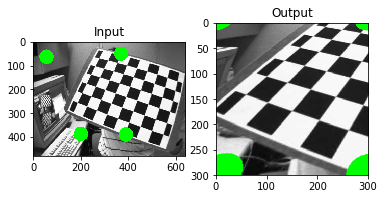

In [20]:
#perspective transformation
img = cv2.imread(path)
rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[200,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
for x,y in pts1:
    cv2.circle(img,(int(x),int(y)),30,(0,255,0),-1)

M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

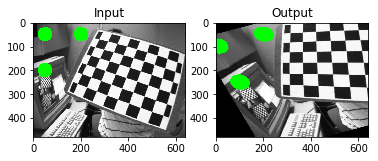

In [21]:
# affine transformation

img = cv2.imread(path)
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

for x,y in pts1:
    cv2.circle(img,(int(x),int(y)),30,(0,255,0),-1)

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [22]:
# rotation
def rotate(angle):
    img = cv2.imread(path,0)
    rows,cols = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    imshow(('input',img),('output',dst),cmap='gray')
interactive(rotate,angle=(0,180,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT05MCwgZGVzY3JpcHRpb249dSdhbmdsZScsIG1heD0xODApLCBPdXRwdXQoKSksIF9kb21fY2xhc3Nlcz0odSd3aWRnZXQtaW7igKY=


In [23]:
# translation
def translation(m1,m2):
    img = cv2.imread(path,0)
    rows,cols = img.shape
    M = np.float32([[1,0,m1],[0,1,m2]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    imshow(('img',dst),cmap='gray')
interactive(translation,m1=(-300,300,1),m2=(-300,300,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J20xJywgbWF4PTMwMCwgbWluPS0zMDApLCBJbnRTbGlkZXIodmFsdWU9MCwgZGVzY3JpcHRpb27igKY=


In [24]:
figsize=(3,3)
def shift_dft(src, dst=None):
    '''
        Rearrange the quadrants of Fourier image so that the origin is at
        the image center. Swaps quadrant 1 with 3, and 2 with 4.
        src and dst arrays must be equal size & type
    '''

    if dst is None:
        dst = np.empty(src.shape, src.dtype)
    elif src.shape != dst.shape:
        raise ValueError("src and dst must have equal sizes")
    elif src.dtype != dst.dtype:
        raise TypeError("src and dst must have equal types")

    if src is dst:
        ret = np.empty(src.shape, src.dtype)
    else:
        ret = dst

    h, w = src.shape[:2]

    cx1 = cx2 = int(w/2)
    cy1 = cy2 = int(h/2)

    # if the size is odd, then adjust the bottom/right quadrants
    if w % 2 != 0:
        cx2 += 1
    if h % 2 != 0:
        cy2 += 1

    # swap quadrants

    # swap q1 and q3
    ret[h-cy1:, w-cx1:] = src[0:cy1 , 0:cx1 ]   # q1 -> q3
    ret[0:cy2 , 0:cx2 ] = src[h-cy2:, w-cx2:]   # q3 -> q1

    # swap q2 and q4
    ret[0:cy2 , w-cx2:] = src[h-cy2:, 0:cx2 ]   # q2 -> q4
    ret[h-cy1:, 0:cx1 ] = src[0:cy1 , w-cx1:]   # q4 -> q2

    if src is dst:
        dst[:,:] = ret

    return dst


def fft(im):
    # convert to grayscale
    # im = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    h, w = im.shape[:2]

    realInput = im.astype(np.float64)

    # perform an optimally sized dft
    dft_M = cv2.getOptimalDFTSize(w)
    dft_N = cv2.getOptimalDFTSize(h)

    # copy A to dft_A and pad dft_A with zeros
    dft_A = np.zeros((dft_N, dft_M, 2), dtype=np.float64)
    dft_A[:h, :w, 0] = realInput

    # no need to pad bottom part of dft_A with zeros because of
    # use of nonzeroRows parameter in cv2.dft()
    cv2.dft(dft_A, dst=dft_A, nonzeroRows=h)

    imshow(("win", im),figsize=figsize,cmap='gray')

    # Split fourier into real and imaginary parts
    image_Re, image_Im = cv2.split(dft_A)

    # Compute the magnitude of the spectrum Mag = sqrt(Re^2 + Im^2)
    magnitude = cv2.sqrt(image_Re**2.0 + image_Im**2.0)

    phase = np.arctan2(image_Im,image_Re)

    # log_phase = cv2.log(1.0+phase)
    # Compute log(1 + Mag)
    log_spectrum = cv2.log(1.0 + magnitude)

    # Rearrange the quadrants of Fourier image so that the origin is at
    # the image center
    shift_dft(log_spectrum, log_spectrum)
    # shift_dft(phase,phase)
    # log_phase = []
    # normalize and display the results as rgb
#     cv2.normalize(log_spectrum, log_spectrum, 0.0, 1.0, cv2.cv.CV_MINMAX)
    cv2.normalize(log_spectrum, log_spectrum, 0.0, 1.0, cv2.NORM_MINMAX)
    
    # cv2.normalize(phase, log_phase, 0.0, 1.0, cv2.cv.CV_MINMAX)

    imshow(("magnitude", log_spectrum),figsize=figsize,cmap='gray')
    imshow(("phase", phase),figsize=figsize,cmap='gray')
    return image_Re, image_Im

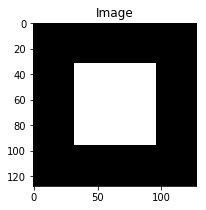

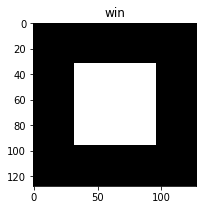

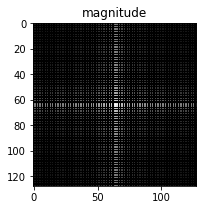

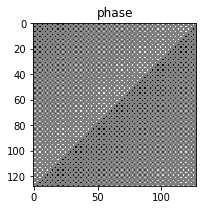

In [32]:
img_size = 128
im = np.zeros((img_size, img_size))
im[int(img_size/4):int(3*img_size/4),int(img_size/4):int(3*img_size/4)] = 1
imshow(("Image",im),figsize=(3,3),cmap='gray')
k = fft(im)

In [25]:
im = np.zeros((img_size, img_size))
im[int(img_size/4):int(3*img_size/4),int(img_size/4+img_size/8):int(2*img_size/4)]  = 1
imshow(("Image",im),figsize=(3,3),cmap='gray')
i = fft(im)

NameError: name 'img_size' is not defined

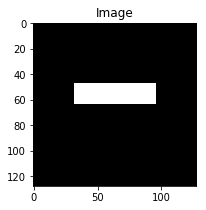

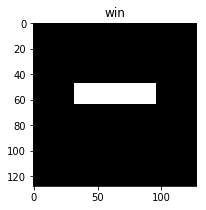

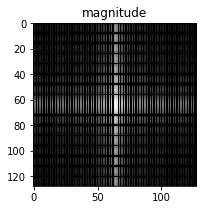

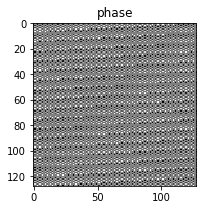

In [35]:
im = np.zeros((img_size, img_size))
im[int(img_size/4+img_size/8):int(2*img_size/4),int(img_size/4):int(3*img_size/4)]  = 1
imshow(("Image",im),figsize=(3,3),cmap='gray')
i = fft(im)

In [26]:
def morph(imgType, method, noise, kernelHeight, kernelWidth):  
    path = join(dbpath,r"morphological/%s.png" % imgType)
    img = cv2.imread(path,0)
    cv2.imwrite('j.png', img)
    if noise:
        rand = np.random.randint(2050-noise,size=img.shape).astype('u1')
        rand[rand!=3]=0
        rand[rand==3]=255
        img = cv2.bitwise_xor(img, rand)
        img[img>=50] = 255
        img[img<50] = 0
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    kernel = np.ones((kernelHeight, kernelWidth), 'u1') # rectangular kernel
    if(method == 'input'):
        imshow(('inputImg',img))
    if(method == 'erode'):
        erosion = cv2.erode(img, kernel, iterations=1)
        imshow(('erode',erosion))
    if (method == 'dilate'):
        dilation = cv2.dilate(img, kernel, iterations=1)
        imshow(('erode',dilation))
    if (method == 'open'):
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        imshow(('opening',opening))
    if (method == 'close'):
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        imshow(('closing',closing))
    if (method == 'grad'):
        gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
        imshow(('gradient',gradient))
    if (method == 'tophat'):
        tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
        imshow(('tophat',tophat))
    if (method == 'blackhat'):
        blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
        imshow(('blackhat',blackhat))

interactive(morph,imgType=['whiteForeGround', 'blackForeground'],method=['input', 'erode','dilate','open','close','grad','tophat'], 
            noise =(0,2000,100),
            kernelHeight=(3,10,1), kernelWidth=(3,10,1))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnaW1nVHlwZScsIG9wdGlvbnM9KHUnd2hpdGVGb3JlR3JvdW5kJywgdSdibGFja0ZvcmVncm91bmQnKSwgdmFsdWXigKY=


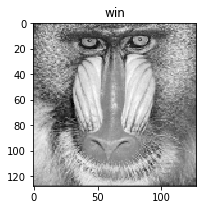

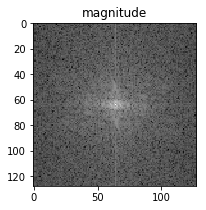

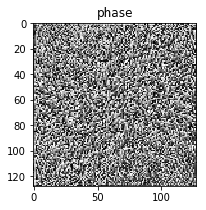

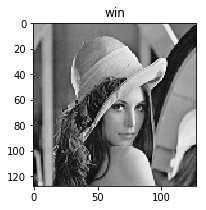

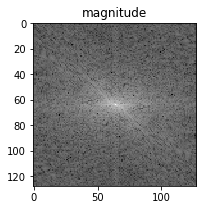

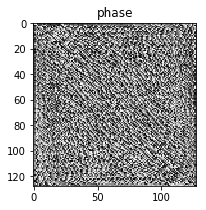

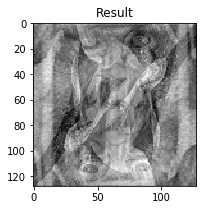

In [37]:
im1 = cv2.imread(join(dbpath,r'phase_img_filter/baboon200.jpg'),0)
im2 = cv2.imread(join(dbpath,r'phase_img_filter/lena.jpg'),0)

im1 = cv2.resize(im1,(128,128))
im2 = cv2.resize(im2,(128,128))

m1,ph1 = fft(im1)
m2,ph2 = fft(im2)
r, c = im1.shape[:2]
i = np.zeros((r,c,2))
i[...,0] = m2
i[...,1] = ph1
real = cv2.idft(i, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
# cv2.normalize(real, real, 0, 255, cv2.cv.CV_MINMAX)
cv2.normalize(real, real, 0, 255, cv2.NORM_MINMAX)

imshow(("Result",real.astype('u1')),
      cmap='gray',figsize=(3,3))

In [7]:
def generateRandomMotionImage(seed):
    img = np.zeros((2000, 2000), 'u1')
    x,y,w,h = (10, 10, 50, 50)
    seed = np.sin(seed) + seed ** 1.2 - .8 *seed
    x += seed ** .9
    y += seed ** 1.1
    w += seed * 1.1
    h += seed * .9
    x0, y0, x1, y1 = x, y, x + w, y + h
    img = put_rect(img, (int(x0), int(y0), int(x1), int(y1)))
    return img


def put_rect(img, bb, color=(255, 255, 255), thickness=2, scale=None, bias=(0, 0, 0, 0)):
    x0,y0,x1,y1 = bb
    cv2.rectangle(img, (x0, y0), (x1, y1), color, thickness)
    return img

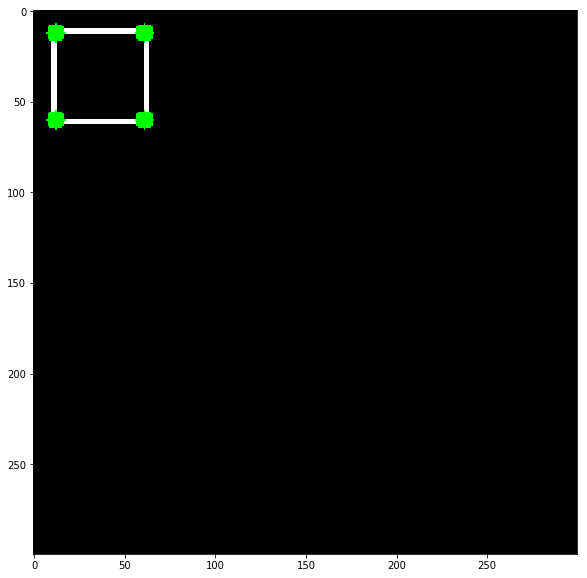

In [8]:
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]])
fno = 1
old_gray = generateRandomMotionImage(fno)
# Take first frame and find corners in it
# dispImg = np.zeros((old_gray.shape[0], old_gray.shape[1], 3), 'u1')
dispImg = cv2.cvtColor(old_gray, cv2.COLOR_GRAY2BGR)
trackImg = dispImg.copy()
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
for p in p0:
    x, y = p[0]
    cv2.circle(dispImg, (int(x), int(y)), 5, (0, 255, 0), -1)
imshow(dispImg[:300,:300])

In [12]:
feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
# Parameters for lucas kanade optical flow
lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255], [255, 255, 0], [0, 255, 255], [255, 0, 255]])
fno = 1
old_gray = generateRandomMotionImage(fno)
# Take first frame and find corners in it
dispImg = np.zeros((old_gray.shape[0], old_gray.shape[1], 3), 'u1')
trackImg = dispImg.copy()
p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
for p in p0:
    x, y = p[0]
    cv2.circle(dispImg, (int(x), int(y)), 5, (0, 255, 0), -1)
# Create a mask image for drawing purposes
while True:
    fno += 1
    crnt_gray = generateRandomMotionImage(fno)
    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, crnt_gray, p0, None, **lk_params)
    if p1 is None or fno > 375:
        cv2.destroyAllWindows()
        break
    # Select good points
    good_new = p1#[st==1]
    good_old = p0#[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        trackImg = cv2.line(trackImg, (a, b), (c, d), color[i].tolist(), 1)
        trackImg = cv2.circle(trackImg, (a, b), 2, color[i].tolist(), -1)
    crnt_frame = cv2.cvtColor(crnt_gray, cv2.COLOR_GRAY2BGR)
    dispImg = cv2.add(trackImg, crnt_frame)
    cv2.namedWindow('dispImg', 0);
    cv2.imshow('dispImg', dispImg)
    k = cv2.waitKey(33) & 0xff
    if k == 27:
        cv2.destroyAllWindows()
        break
    # Now update the previous frame and previous points
    old_gray = crnt_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
